In [4]:
!pip install prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn5fn2fy4/cupmpxh0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn5fn2fy4/st6ekboy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59213', 'data', 'file=/tmp/tmpn5fn2fy4/cupmpxh0.json', 'init=/tmp/tmpn5fn2fy4/st6ekboy.json', 'output', 'file=/tmp/tmpn5fn2fy4/prophet_model4x89n17h/prophet_model-20230819091604.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:16:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:16:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 6.059509089110258
Mean Squared Error: 36.7177
Mean Absolute Percentage Error (MAPE): 21.6009%
Mean Absolute Error: 4.791858236732679


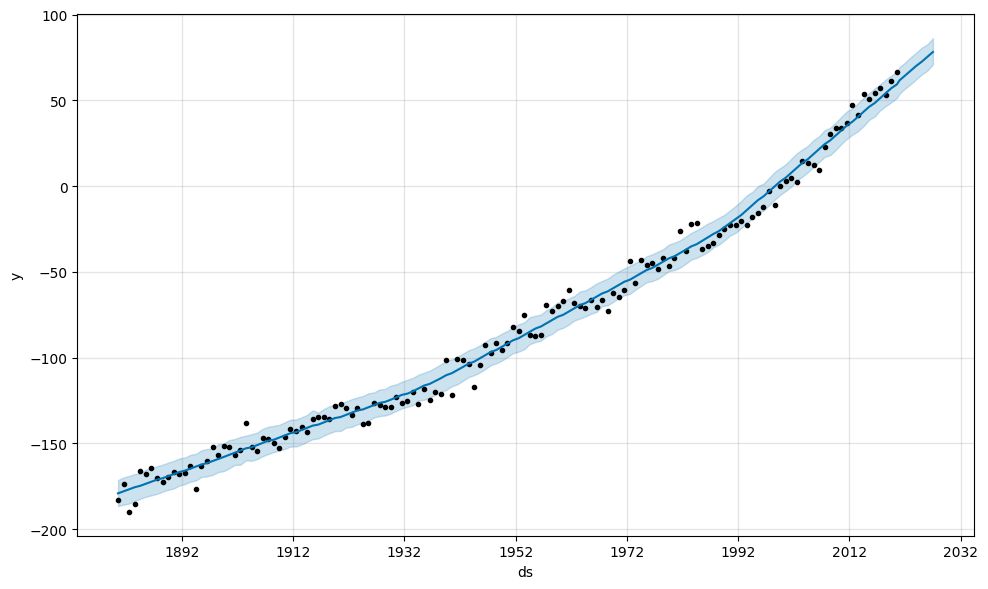

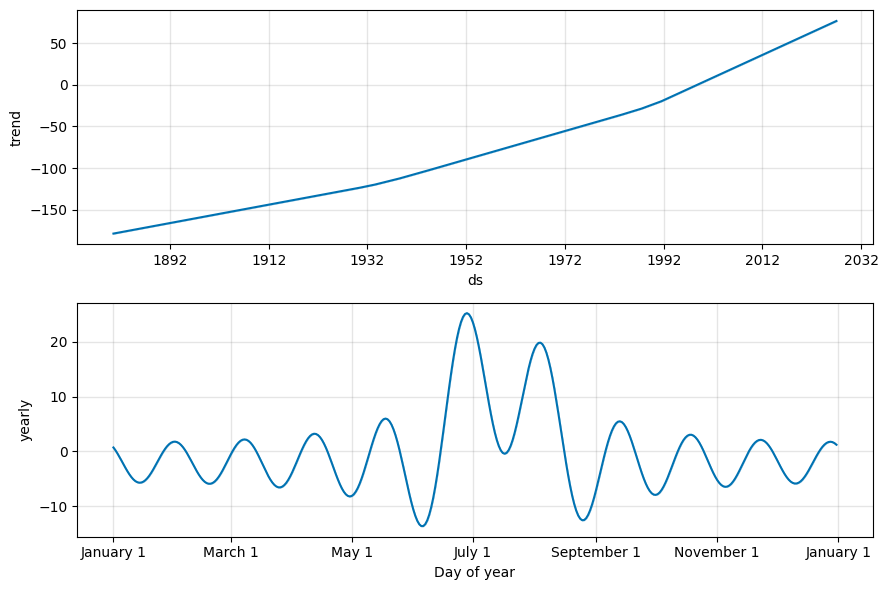

In [19]:
####For sea level rise
import numpy as np
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Load your data into a DataFrame
data = pd.read_csv('Global_sea_level_rise.csv')
data = data[['date', 'mmfrom1993-2008average']]

data = data.dropna()

# Rename columns to match Prophet's expectations
data.rename(columns={'date': 'ds', 'mmfrom1993-2008average': 'y'}, inplace=True)

# Initialize the model
model = Prophet(yearly_seasonality=True)

# Fit the model to the data
model.fit(data)


# Create a future dataframe for predictions
future = model.make_future_dataframe(periods=7, freq='Y')  # Change the number of periods as needed

# Make predictions
forecast = model.predict(future)
fig = model.plot(forecast)
from sklearn.metrics import mean_absolute_error
# Calculate Mean Absolute Error
y_true = data['y']
y_pred = forecast['yhat'][:-7]  # Exclude the forecasted values for future dates
mae = mean_absolute_error(y_true, y_pred)

from sklearn.metrics import mean_squared_error# Calculate RMSE
rmse = mean_squared_error(y_true,y_pred, squared=False)
print("RMSE:", rmse)

# Calculate Mean Squared Error
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error: {mse:.4f}")


def mean_absolute_percentage_error(y_true, predictions):
    return np.mean(np.abs((y_true - predictions) / y_true)) * 100

mape = mean_absolute_percentage_error(y_true,y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")


print(f'Mean Absolute Error: {mae}')
# Plot trend and seasonality components
fig_components = model.plot_components(forecast)






INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn5fn2fy4/g9ws1o9n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn5fn2fy4/hhfcd39l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76002', 'data', 'file=/tmp/tmpn5fn2fy4/g9ws1o9n.json', 'init=/tmp/tmpn5fn2fy4/hhfcd39l.json', 'output', 'file=/tmp/tmpn5fn2fy4/prophet_modelq8j90kdj/prophet_model-20230819092006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:20:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:20:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 0.8048380269485939
Mean Squared Error: 0.6478
Mean Absolute Percentage Error (MAPE): 17.8305%
Mean Absolute Error: 0.5205295680957769


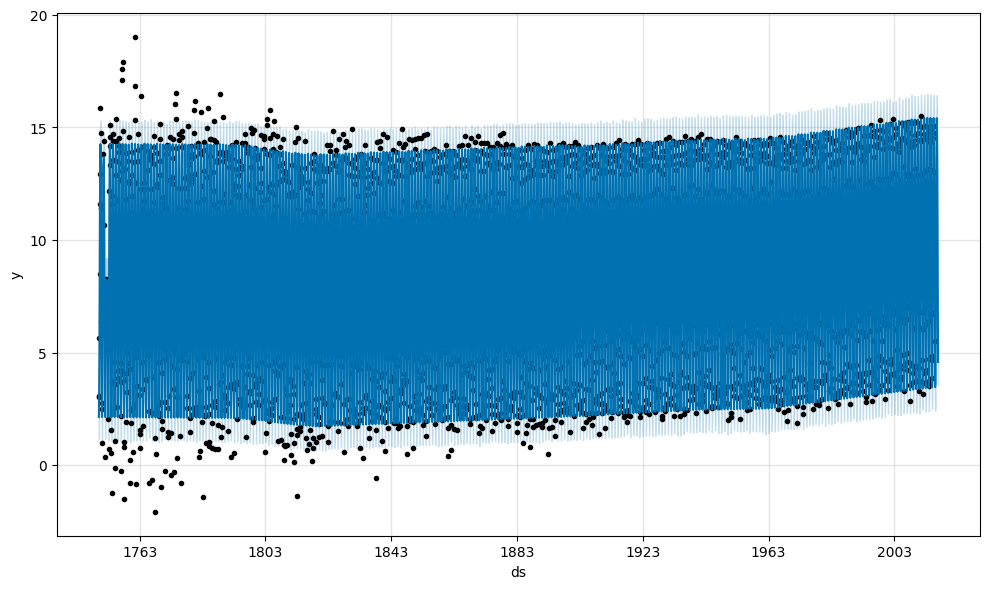

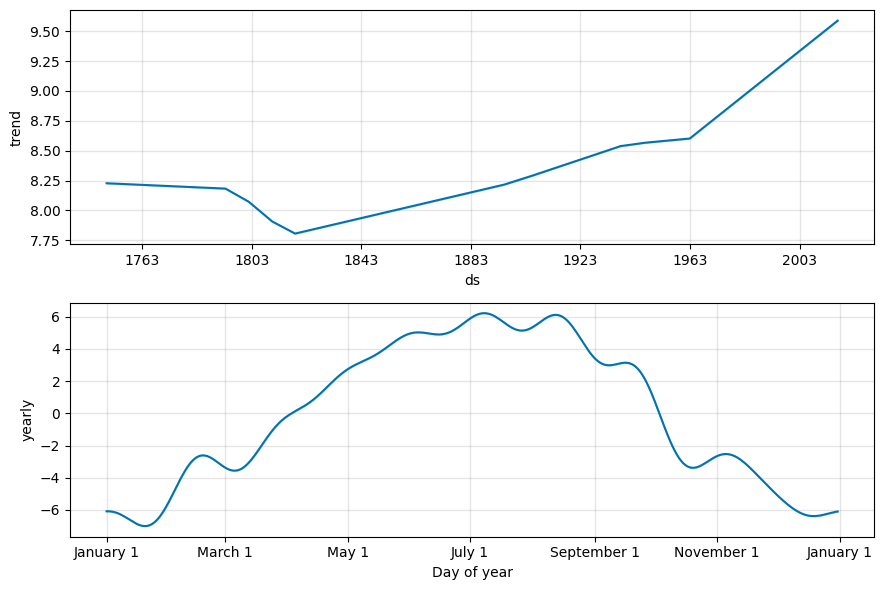

In [21]:
####For Global Temperature
import numpy as np
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Load your data into a DataFrame
data = pd.read_csv('GlobalTemperatures.csv')
data = data[['dt', 'LandAverageTemperature']]

data = data.dropna()

# Rename columns to match Prophet's expectations
data.rename(columns={'dt': 'ds', 'LandAverageTemperature': 'y'}, inplace=True)

# Initialize the model
model = Prophet()

# Fit the model to the data
model.fit(data)

# Create a future dataframe for predictions
future = model.make_future_dataframe(periods=12, freq='M')  # Change the number of periods as needed

# Make predictions
forecast = model.predict(future)
fig = model.plot(forecast)
from sklearn.metrics import mean_absolute_error
# Calculate Mean Absolute Error
y_true = data['y']
y_pred = forecast['yhat'][:-12]  # Exclude the forecasted values for future dates
mae = mean_absolute_error(y_true, y_pred)

from sklearn.metrics import mean_squared_error# Calculate RMSE
rmse = mean_squared_error(y_true,y_pred, squared=False)
print("RMSE:", rmse)

# Calculate Mean Squared Error
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error: {mse:.4f}")


def mean_absolute_percentage_error(y_true, predictions):
    return np.mean(np.abs((y_true - predictions) / y_true)) * 100

mape = mean_absolute_percentage_error(y_true,y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")


print(f'Mean Absolute Error: {mae}')
# Plot trend and seasonality components
fig_components = model.plot_components(forecast)






INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn5fn2fy4/a3x98tx0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn5fn2fy4/zg7fngqz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66675', 'data', 'file=/tmp/tmpn5fn2fy4/a3x98tx0.json', 'init=/tmp/tmpn5fn2fy4/zg7fngqz.json', 'output', 'file=/tmp/tmpn5fn2fy4/prophet_modelwvfhd18c/prophet_model-20230819094243.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:42:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:42:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 7.9281820333323925
Mean Squared Error: 62.8561
Mean Absolute Percentage Error (MAPE): 13.5520%
Mean Absolute Error: 6.06318392427532


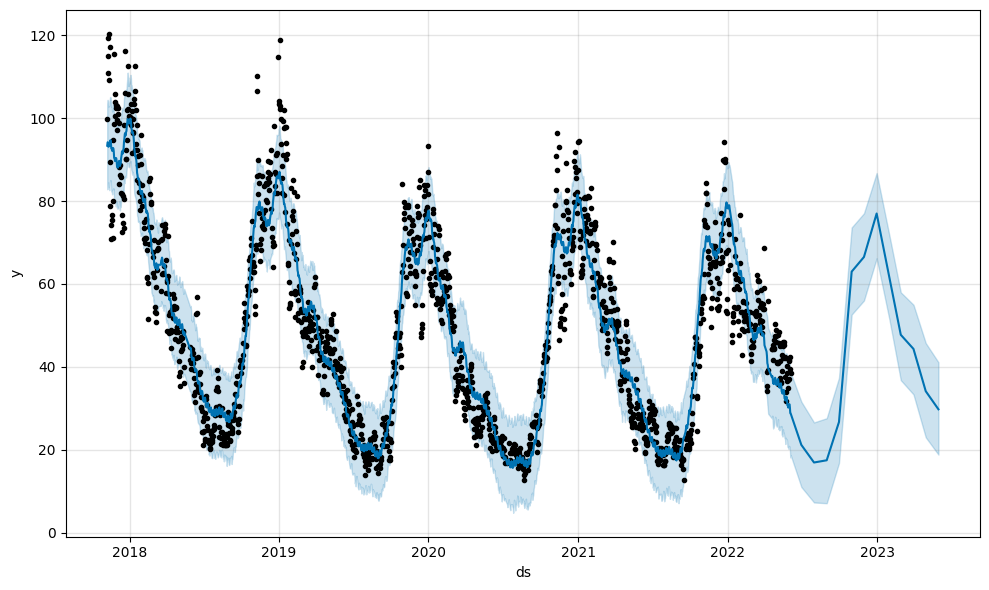

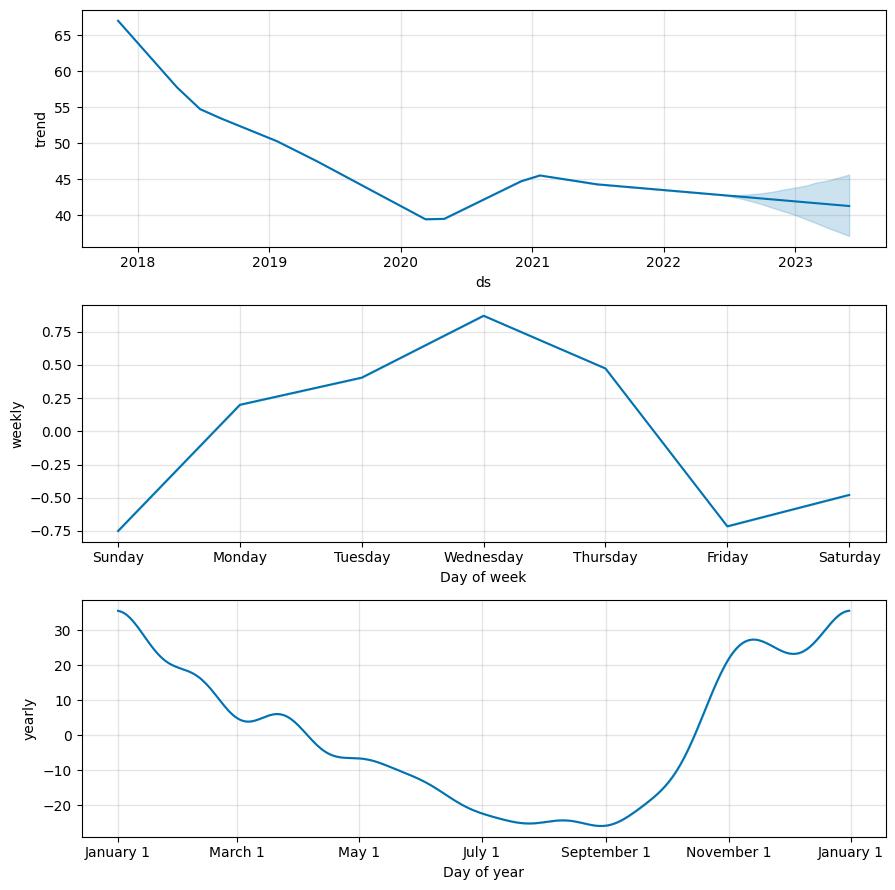

In [22]:
####For AirQuality
import numpy as np
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

data=pd.read_csv('air-quality-india.csv')
data = data[['Timestamp', 'PM2.5']]
data = data.dropna()
data["Timestamp"] = pd.to_datetime(data["Timestamp"])
data['Timestamp'] = data['Timestamp'].dt.date

data=pd.DataFrame(data.groupby('Timestamp')['PM2.5'].mean()).reset_index()


# Rename columns to match Prophet's expectations
data.rename(columns={'Timestamp': 'ds', 'PM2.5': 'y'}, inplace=True)

# Initialize the model
model = Prophet()

# Fit the model to the data
model.fit(data)

# Create a future dataframe for predictions
future = model.make_future_dataframe(periods=12, freq='M')  # Change the number of periods as needed

# Make predictions
forecast = model.predict(future)
fig = model.plot(forecast)
from sklearn.metrics import mean_absolute_error
# Calculate Mean Absolute Error
y_true = data['y']
y_pred = forecast['yhat'][:-12]  # Exclude the forecasted values for future dates
mae = mean_absolute_error(y_true, y_pred)

from sklearn.metrics import mean_squared_error# Calculate RMSE
rmse = mean_squared_error(y_true,y_pred, squared=False)
print("RMSE:", rmse)

# Calculate Mean Squared Error
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error: {mse:.4f}")


def mean_absolute_percentage_error(y_true, predictions):
    return np.mean(np.abs((y_true - predictions) / y_true)) * 100

mape = mean_absolute_percentage_error(y_true,y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")


print(f'Mean Absolute Error: {mae}')
# Plot trend and seasonality components
fig_components = model.plot_components(forecast)